<h1>Brief description about the project

Data set contains 5 features:wconfid,pctid,x,y,z

Added magnitude as 6 feature and  below Algorithm used is for fall detection feature finding
the logic for finding fall is
 if the parameter > threshold value of the parameter
    then
     return fall detection
 return no fall detection

with the above algorithm created lables and then used LSTM model to find the accuracy of model by changing threshold. The below ressearch papers are used as references. Model can be changes according to the data provided and different scenarios like sitting, fast sitting can be identified by cahnging the threshold value.

https://www.hindawi.com/journals/jam/2014/896030/alg1/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9618891/

Overall Accuracy: 0.9978 and output is
['fall' 'fall' 'fall' ... 'fall' 'not fall' 'fall']

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../Downloads/accelerometer.csv')
df

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
...,...,...,...,...,...
152995,3,100,1.051,0.090,-0.262
152996,3,100,0.918,0.039,-0.129
152997,3,100,1.156,-0.094,-0.227
152998,3,100,0.934,0.203,-0.172


In [46]:
df['magnitude'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
df

,wconfid,pctid,x,y,z,magnitude
0,1,20,1.004,0.090,-0.125,1.015747
1,1,20,1.004,-0.043,-0.125,1.012665
2,1,20,0.969,0.090,-0.121,0.980664
3,1,20,0.973,-0.012,-0.137,0.982671
4,1,20,1.000,-0.016,-0.121,1.007421
...,...,...,...,...,...,...
152995,3,100,1.051,0.090,-0.262,1.086897
152996,3,100,0.918,0.039,-0.129,0.927839
152997,3,100,1.156,-0.094,-0.227,1.181821
152998,3,100,0.934,0.203,-0.172,0.971159


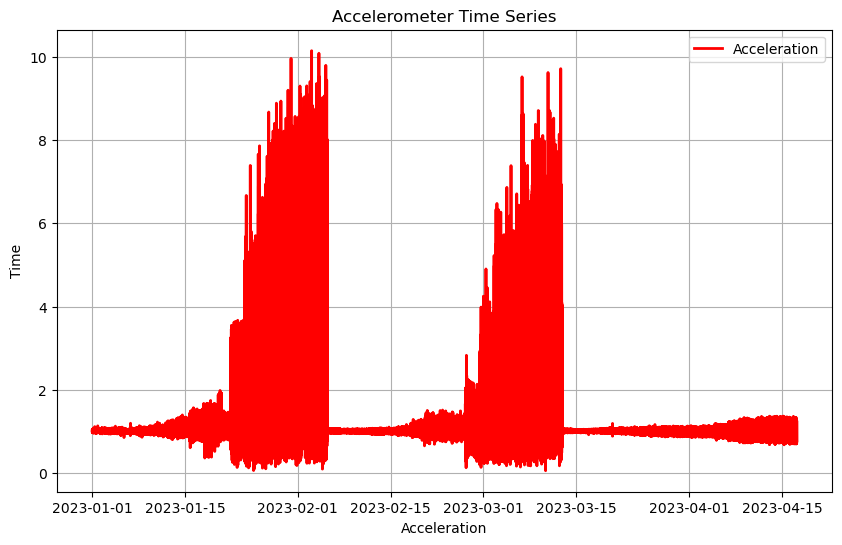

In [83]:
def plot_acceleration(df, title="Accelerometer Time Series"):
    time_indices = pd.date_range(start='2023-01-01', periods=len(df), freq='T')  
    plt.figure(figsize=(10, 6))
    plt.plot( time_indices,df['magnitude'], label='Acceleration', color='red', linestyle='-', linewidth=2)
    plt.xlabel('Acceleration')
    plt.ylabel('Time')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
plot_acceleration(df)


In [95]:
threshold = 1.0 
df['fall'] = (df['magnitude'] > threshold).astype(int)
df

,wconfid,pctid,x,y,z,magnitude,fall
0,1,20,1.004,0.090,-0.125,1.015747,1
1,1,20,1.004,-0.043,-0.125,1.012665,1
2,1,20,0.969,0.090,-0.121,0.980664,0
3,1,20,0.973,-0.012,-0.137,0.982671,0
4,1,20,1.000,-0.016,-0.121,1.007421,1
...,...,...,...,...,...,...,...
152995,3,100,1.051,0.090,-0.262,1.086897,1
152996,3,100,0.918,0.039,-0.129,0.927839,0
152997,3,100,1.156,-0.094,-0.227,1.181821,1
152998,3,100,0.934,0.203,-0.172,0.971159,0


In [84]:
X = df[['x', 'y', 'z', 'magnitude']]
y = df['fall']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
3825/3825 [==============================] - 68s 18ms/step - loss: 0.0833 - accuracy: 0.9676 - val_loss: 0.0348 - val_accuracy: 0.9812
Epoch 2/10
3825/3825 [==============================] - 67s 17ms/step - loss: 0.0191 - accuracy: 0.9930 - val_loss: 0.0188 - val_accuracy: 0.9919
Epoch 3/10
3825/3825 [==============================] - 67s 17ms/step - loss: 0.0156 - accuracy: 0.9937 - val_loss: 0.0114 - val_accuracy: 0.9972
Epoch 4/10
3825/3825 [==============================] - 67s 17ms/step - loss: 0.0143 - accuracy: 0.9942 - val_loss: 0.0124 - val_accuracy: 0.9951
Epoch 5/10
3825/3825 [==============================] - 67s 18ms/step - loss: 0.0128 - accuracy: 0.9948 - val_loss: 0.0113 - val_accuracy: 0.9958
Epoch 6/10
3825/3825 [==============================] - 68s 18ms/step - loss: 0.0124 - accuracy: 0.9949 - val_loss: 0.0166 - val_accuracy: 0.9920
Epoch 7/10
3825/3825 [==============================] - 68s 18ms/step - loss: 0.0121 - accuracy: 0.9948 - val_loss: 0.0081 -

In [91]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


957/957 [==============================] - 7s 8ms/step - loss: 0.0074 - accuracy: 0.9978
Test Loss: 0.0074, Test Accuracy: 0.9978


In [125]:
predictions = model.predict(X_test)
threshold = 0.5
fall_predictions = (predictions > threshold).astype(int)
fall_predictions_labels = np.where(fall_predictions == 1, 'fall', 'not fall')
overall_accuracy = np.mean(fall_predictions.flatten() == y_test)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

fall_predictions_labels = fall_predictions_labels.flatten()
print(fall_predictions_labels)

957/957 [==============================] - 5s 5ms/step

Overall Accuracy: 0.9978
['fall' 'fall' 'fall' ... 'fall' 'not fall' 'fall']


<h1>whole code as function

Epoch 1/5
957/957 [==============================] - 21s 21ms/step - loss: 0.2100 - accuracy: 0.9105 - val_loss: 0.0413 - val_accuracy: 0.9928
Epoch 2/5
957/957 [==============================] - 19s 20ms/step - loss: 0.0305 - accuracy: 0.9930 - val_loss: 0.0243 - val_accuracy: 0.9953
Epoch 3/5
957/957 [==============================] - 19s 20ms/step - loss: 0.0212 - accuracy: 0.9944 - val_loss: 0.0187 - val_accuracy: 0.9954
Epoch 4/5
957/957 [==============================] - 20s 21ms/step - loss: 0.0171 - accuracy: 0.9952 - val_loss: 0.0147 - val_accuracy: 0.9968
Epoch 5/5
957/957 [==============================] - 8s 8ms/step - loss: 0.0210 - accuracy: 0.9891
Test Loss: 0.0210, Test Accuracy: 0.9891
957/957 [==============================] - 6s 6ms/step

Overall Accuracy: 0.5385


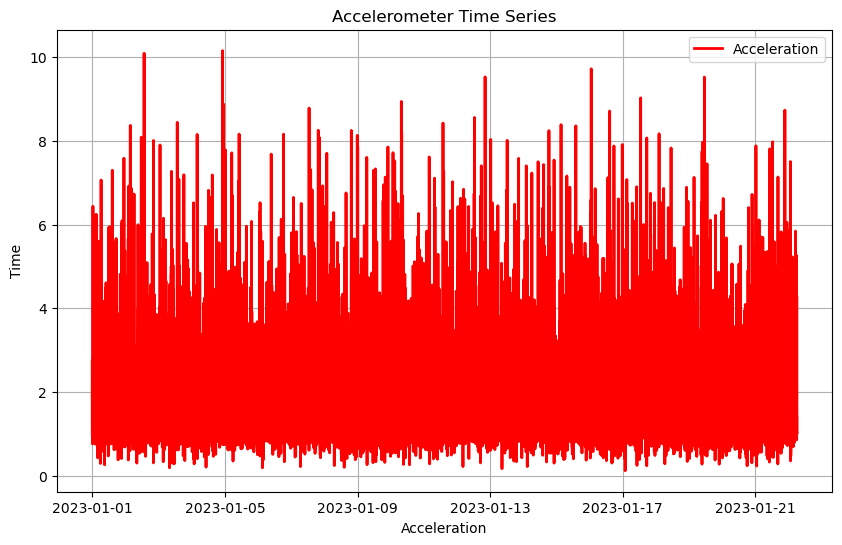

[['fall']
 ['fall']
 ['fall']
 ...
 ['fall']
 ['not fall']
 ['fall']]


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def preprocess_data(df):
    df['magnitude'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
    threshold = 1.0
    df['fall'] = (df['magnitude'] > threshold).astype(int)
    X = df[['x', 'y', 'z', 'magnitude']]
    y = df['fall']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, scaler

def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def detect_falls(model, X_test, scaler, threshold=0.3):
    predictions = model.predict(X_test)
    X_test_original_scale = scaler.inverse_transform(X_test.reshape((X_test.shape[0], X_test.shape[2])))
    fall_predictions = (predictions > threshold).astype(int)
    fall_predictions_labels = np.where(fall_predictions == 1, 'fall', 'not fall')
    return fall_predictions_labels, X_test_original_scale
X_train, X_test, y_train, y_test, scaler = preprocess_data(df)
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_model(input_shape)
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), verbose=1)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')
fall_predictions_labels, X_test_original_scale = detect_falls(model, X_test, scaler)
overall_accuracy = np.mean(fall_predictions_labels == np.where(y_test == 1, 'fall', 'not fall'))
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")
plot_acceleration(pd.DataFrame(data=X_test_original_scale, columns=['x', 'y', 'z', 'magnitude']))
print(fall_predictions_labels)
